# Generating Training Data

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math
import random

In [2]:
functions = [lambda x : x, 
             lambda x : 101 - x,
             lambda x : 50.5 + 49.5 * math.sin(math.pi / 2 + x / (5 * math.pi)),
             lambda x : random.randint(1, 101)]

In [3]:
points = []
xs = []
ys = []
for i in range(50):
    x = random.randint(1,101)
    y = functions[2](x)
#     print(x, y)
    points.append((x,y))
    xs.append(x)
    ys.append(y)

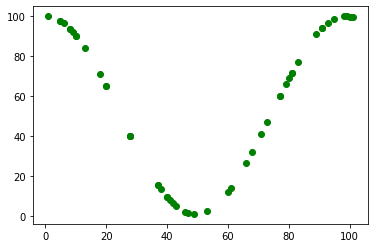

In [4]:
plt.figure()
plt.scatter(xs, ys, color="green")

In [5]:
def plot_function(func_num, plot=True):
    """
    Plot 50 (x,y) pairs for given function
    """
    points = []
    xs = []
    ys = []
    colors = ['maroon', 'blue', 'green', 'orange']
    for i in range(50):
        x = random.randint(1,101)
        y = functions[func_num](x)
    #     print(x, y)
        points.append((x,y))
        xs.append(x)
        ys.append(y)
    if plot:
        plt.figure()
        plt.scatter(xs, ys, color=colors[func_num])
    return (xs, ys)

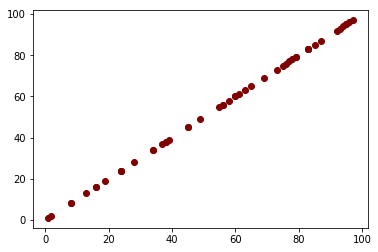

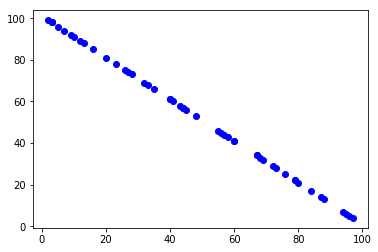

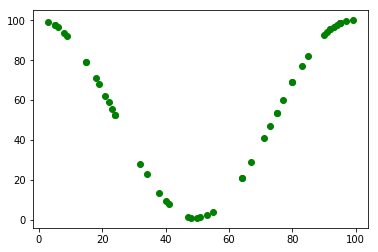

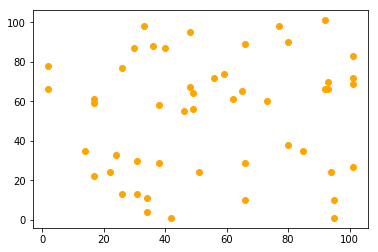

In [6]:
for i in range(4):
    plot_function(i)

In [9]:
def graph_normal(mu, sigma):
    # uncomment this code to graph the normal distribution 

    count, bins, ignored = plt.hist(a, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()

In [10]:
# mu, sigma = 0, 1 # mean and standard deviation
a = np.random.normal(1, 1, 1000)
b = np.random.normal(0, 1, 1000)

In [11]:
asum= 0
for i in range(25):
    asum += a[random.randint(0,len(a)-1)]
print(asum/25)

1.0893765648646205


# Model for Generations with No Priors

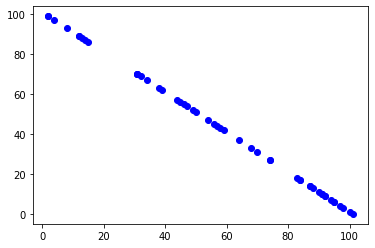

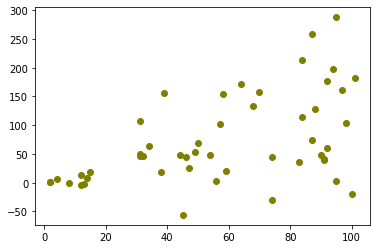

In [12]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
for i in range(50):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)

    mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]
    
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")

[16, 5, 33, 6, 43, 98, 93, 24, 31, 46, 75, 13, 101, 57, 27, 70, 97, 3, 32, 84, 93, 53, 64, 34, 3, 76, 75, 80, 64, 96, 90, 8, 26, 87, 93, 10, 79, 98, 71, 38, 73, 14, 50, 24, 12, 37, 75, 26, 23, 19] [85, 96, 68, 95, 58, 3, 8, 77, 70, 55, 26, 88, 0, 44, 74, 31, 4, 98, 69, 17, 8, 48, 37, 67, 98, 25, 26, 21, 37, 5, 11, 93, 75, 14, 8, 91, 22, 3, 30, 63, 28, 87, 51, 77, 89, 64, 26, 75, 78, 82]
[16, 5, 33, 6, 43, 98, 93, 24, 31, 46, 75, 13, 101, 57, 27, 70, 97, 3, 32, 84, 93, 53, 64, 34, 3, 76, 75, 80, 64, 96, 90, 8, 26, 87, 93, 10, 79, 98, 71, 38, 73, 14, 50, 24, 12, 37, 75, 26, 23, 19] [6.894113187926261, 8.952872649733905, 9.738185266298963, 2.169478936117758, -39.66382746055367, 35.05112120741638, 92.56322447752906, 21.91799673569917, 46.591198697764305, 40.04771947980804, 174.4908982395653, 44.37084809079091, 114.0903658077487, 71.08126292540132, 3.6858943848731145, -28.410211086553605, 46.282601073984985, -0.8941828030073143, 52.17208642648874, 160.75680735416677, 365.8164718414003, 84.7

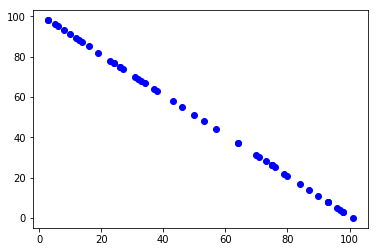

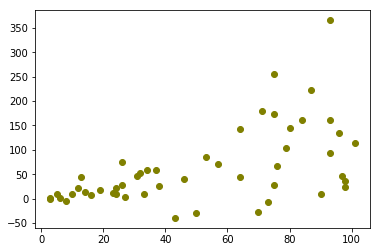

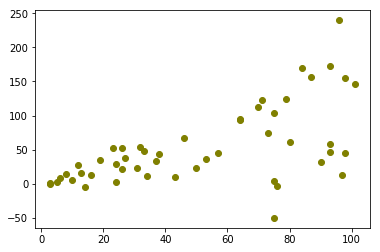

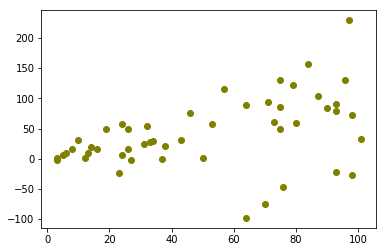

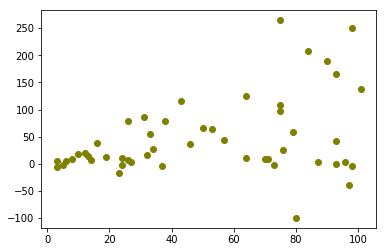

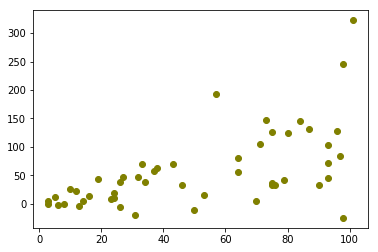

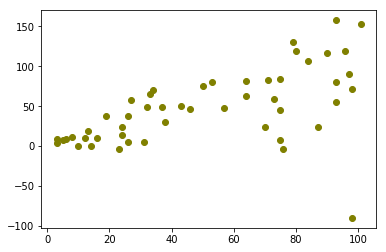

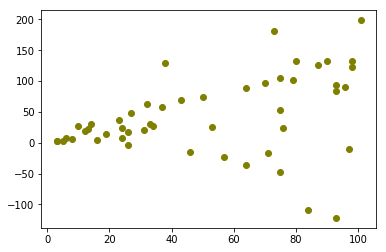

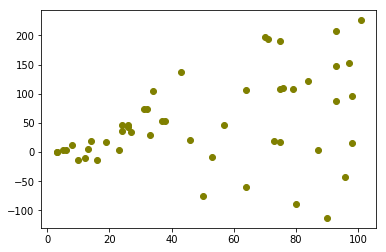

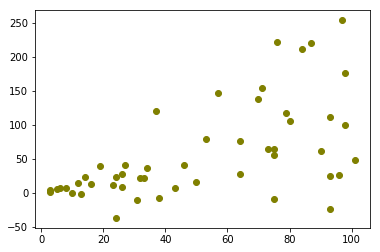

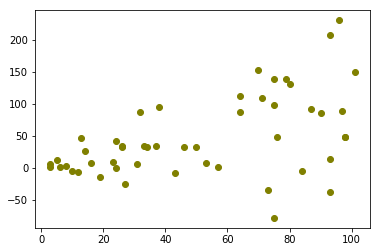

In [47]:
#### for multiple generations


# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

for i in range(10):
    
    print(xs, ys)
    
    new_x = []
    new_y = []
    for i in range(50):
#         ind = random.randint(0, len(xs)-1)
#         x = xs.pop(ind)
#         y = ys.pop(ind)
        
        x = xs[i]
        y = ys[i]

        bag_x.append(x)
        bag_y.append(y)

        mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]

        sigma = 0.001

        y = np.random.normal(mu, sigma, 1000)
        y = y[random.randint(0,len(y)-1)]

    #     # alternative method to sample from normal
    #     y = mu + np.random.normal() * sigma

        new_x.append(x)
        new_y.append(y)

    # graph after one generation

    plt.figure()
    plt.scatter(new_x, new_y, color="#808000")
    
    xs = new_x
    ys = new_y

# Model For Generation with Priors

In [39]:
def get_subject_func_extremes(xs, ys, x):
    tups = []
    for ind in range(len(xs)):
        tups.append((xs[ind],ys[ind]))
    tups.sort()
    x1,y1 = tups[0]
    x2,y2 = tups[-1]
    slope = (y2 -y1)/(x2 -x1)
    y_int = y1 - slope*x1
    return x * slope + y_int

def get_subject_func_priors(xs, ys, x):
    functions = [(100, -1), (100, -2), (75, -1), (1, 0), (2, 0), (3, 0)] #tuples of slope and y_intercept of functions
    y_max_ind = ys[max(y)]
    if abs(max(y) - xs[y_max_ind]) > 20: #place higher weight on negative slopes
        probs = [0.4, 0.2, 0.1, 0.2, 0.05, 0.05]
    else:
        probs = [0.2, 0.05, 0.05, 0.4, 0.15, 0.15]   
        
    # elements at corresponding indices of functions and probs should be paired together, 
    # i.e. y = 100 - x has a prior probability of 0.4 

    cum_sum_probs = [probs[0]]
    for ind in range(1, len(probs)):
        cum_sum_probs.append(cum_sum_probs[-1]+probs[ind])
    
    #determine which function to select
    prob = random.randint(0, 100)
    for ind in range(len(cum_sum_probs)):
        threshold = cum_sum_probs[ind] * 100
        if prob <= threshold:
            slope, y_int = functions[ind]
            return slope * x + y_int
    slope, y_int = functions[-1]
    return slope*x+y_int


TypeError: 'int' object is not iterable

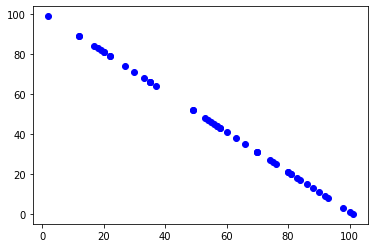

In [41]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)

    mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]
    
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# have the subject label 25 points
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)
    
    #subject gets the x that they have to label, along with the xvalues and corresponding yvalues they know so far
    subject_y = get_subject_func_priors(new_x, new_y, x)
    
    new_x.append(x)
    new_y.append(subject_y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")